In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
repouso = pd.read_csv('samples/repouso.csv')
repouso_mongo = pd.read_csv('samples/repouso_mongo.csv')
repouso_postgres = pd.read_csv('samples/repouso_postgres.csv')

mongo = pd.read_csv('samples/mongo.csv')
tempos_mongo = pd.read_csv('samples/tempos_mongo.csv', names=['start', 'finish'])



In [16]:
duracao_mongo = tempos_mongo['finish'] - tempos_mongo['start']
duracao_mongo

0     1.835565
1    36.593181
2     1.128317
3     0.012261
4     4.738548
5     7.902724
6     6.702366
dtype: float64

In [49]:
experimentos_mongo = tempos_mongo.apply(
    lambda row: mongo[(mongo['timestamp'] > row['start']) & (mongo['timestamp'] <= row['finish'] + 0.2)][:].reset_index(drop=True),
    axis=1
).tolist()

In [50]:
experimentos_mongo[3]

,timestamp,disk_rb,disk_rc,disk_rt,disk_wb,disk_wc,disk_wt,ram,usage
0,1.668378e+09,341727.531037,9.812775,24.533746,0.0,0.0,0.0,3207516160,2.5


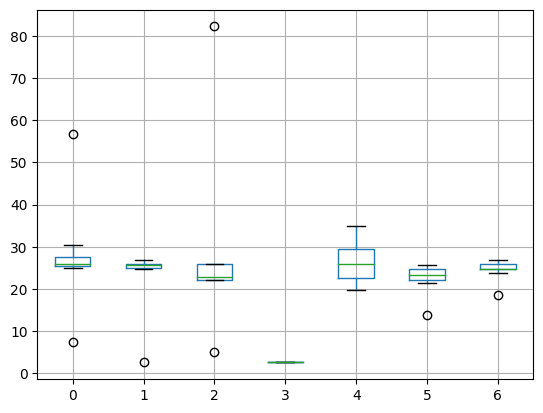

In [59]:
cpu_mongo = pd.DataFrame()
for i, exp in enumerate(experimentos_mongo):
    cpu_mongo[i] = exp['usage']
cpu_mongo.boxplot()
plt.show()

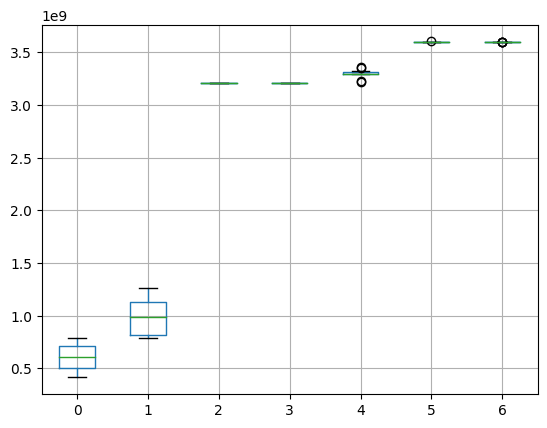

In [56]:
ram_mongo = pd.DataFrame()
for i, exp in enumerate(experimentos_mongo):
    ram_mongo[i] = exp['ram']
ram_mongo.boxplot()
plt.show()

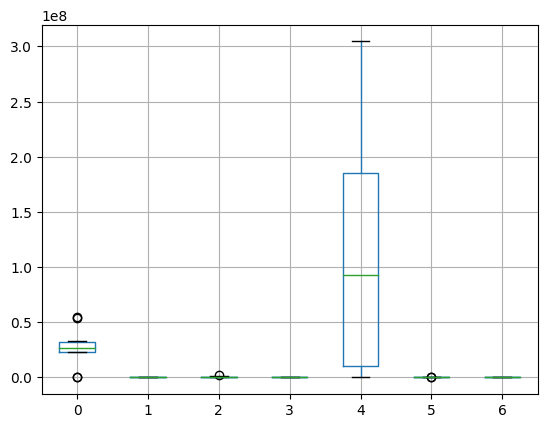

In [61]:
wb_mongo = pd.DataFrame()
for i, exp in enumerate(experimentos_mongo):
    wb_mongo[i] = exp['disk_wb']
wb_mongo.boxplot()
plt.show()

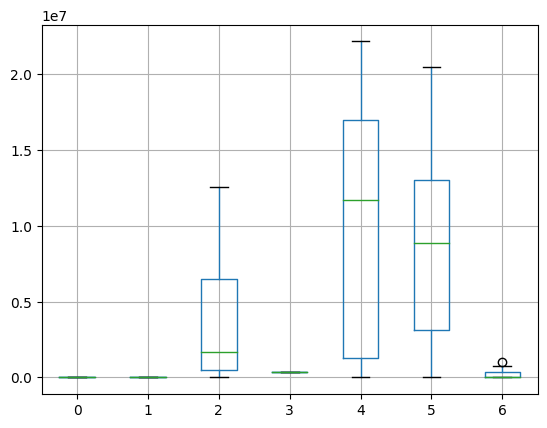

In [62]:
rb_mongo = pd.DataFrame()
for i, exp in enumerate(experimentos_mongo):
    rb_mongo[i] = exp['disk_rb']
rb_mongo.boxplot()
plt.show()